<a href="https://colab.research.google.com/github/318281029SBH/Curso-CIDWA/blob/main/plot_svm_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# SVM-Anova: SVM with univariate feature selection

This example shows how to perform univariate feature selection before running a
SVC (support vector classifier) to improve the classification scores. We use
the iris dataset (4 features) and add 36 non-informative features. We can find
that our model achieves best performance when we select around 10% of features.


Automatically created module for IPython interactive environment


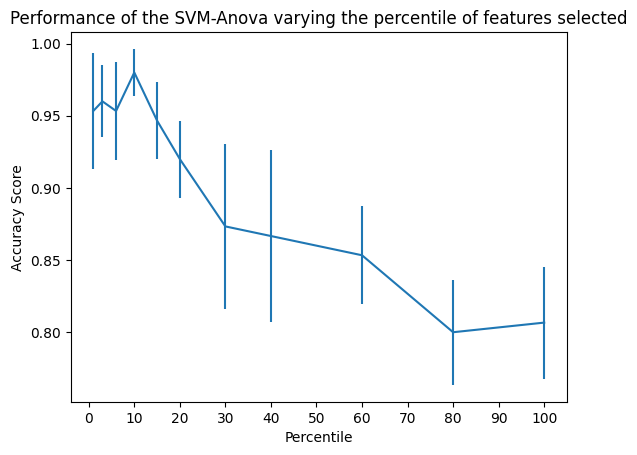

In [1]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# #############################################################################
# Import some data to play with
X, y = load_iris(return_X_y=True)
# Add non-informative features
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have an full-blown estimator
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

In [3]:
a,b=load_iris(return_X_y=True)

In [12]:
pba = load_iris(as_frame=True)

In [10]:
import pandas as pd

In [15]:
# Create a DataFrame from the data
iris_df = pd.DataFrame(pba.data, columns=pba.feature_names)

# Add the target as a new column
iris_df['target'] = pba.target

display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
